In [443]:
%config IPCompleter.greedy=True

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.io
from scipy.special import expit
from scipy import optimize
from random import sample

In [444]:
data = scipy.io.loadmat("ex3data1.mat")

In [445]:
X = data['X']; y = data['y']

In [446]:
X.shape

(5000, 400)

In [447]:
y.shape

(5000, 1)

In [448]:
np.unique(y)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=uint8)

(200, 200)


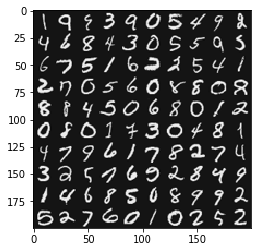

In [449]:
def displayData(X, index_list=[]):
    row, col = 10, 10
    h, w = 20, 20
    if len(index_list) == 0:
        index_list = sample(range(X.shape[0]), row * col)
        
    picture = np.zeros((row*h, col*w))
    print(picture.shape)
    
    i, j = 0, 0
    for index in index_list:
        if j == col:
            j = 0
            i += 1
        row_position = i * h
        col_position = j * w
        image = X[index].reshape(h, w).T
        #print(image.shape)
        #print(row_position, row_position + h, col_position, col_position + w)
        picture[row_position:row_position + h, col_position:col_position + w] = image
        j += 1
    
    plt.imshow(picture, cmap='gray')
    
displayData(X)

#### prepare data 

In [450]:
np.ones((5, 1))
X_ = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)
theta = np.zeros((X_.shape[1], 1))

print(X_.shape)
print(theta.shape)

(5000, 401)
(401, 1)


In [500]:
def hypothesis(theta, X):
    return expit(X.dot(theta))

In [503]:
#return J: 1*1 matrix, Gradient = 401 * 1
def lrCostFunction(theta, X, y, alpha):
    m = float(len(y))
    #print("\ttheta: ", theta.shape, "X: ", X.shape, "y: ", y.shape, "m:", m)
    h = hypothesis(theta, X)
    #print("y:", y.shape, "h:", h.shape)
    
    left_term = np.log(h).T.dot(-y)
    right_term = np.log(1-h).T.dot(1-y)
    #print("\tleft_term:", left_term.shape, "right_term", right_term.shape)
    #reg_term
    reg_term = theta.T.dot(theta) * (alpha/(2*float(m)))
    
    J = (left_term - right_term)/m + reg_term
    
    #gradient
    # X = 5000 * 401
    # h(x) - y = 5000 * 1
    #print('\tX.T:', X.T.shape, 'y:', y.shape, 'h:', h.shape)
    grad = (X.T.dot((h-y.flatten()))/m)
    #print("\tgrad:", grad.shape)
    grad_reg_term = (theta/m)
    #grad_reg_term.reshape(len(theta), 1)
    #print('\tgrad_term:', grad_reg_term.shape)
    grad[0] = 0
    grad += grad_reg_term
    #print("\tcost:", J)
    return J, grad

grad, J = lrCostFunction(theta, X_, y, alpha=0.1)

In [472]:
def optimizeTheta(theta, X, y, alpha=1.):
    #print("theta: ", theta.shape, "X: ", X.shape, "y: ", y.shape)
    result = optimize.minimize(lrCostFunction,
                      theta, 
                      args=(X, y, alpha),
                      options={"maxiter":12, "disp":True}, method="Newton-CG", jac=True)
    return result.x, result.fun

def oneVsAll(theta, X, y):
    print("theta: ", theta.shape, "X: ", X.shape, "y: ", y.shape)
    unique_label, indices = np.unique(y, return_index=True)
    m = X.shape[0]
    print("unique label:", unique_label)
    
    optimized_theta_list = []
    
    for label in unique_label:
        #make training set
        print("label:", label, "size:", len(X[y.flatten() == label]))
        
        answer = np.zeros((m,1))
        answer[y==label] = 1
        initial_theta = np.zeros((401, 1))
        
        optimized_theta, min_cost = optimizeTheta(initial_theta, X, answer)
        optimized_theta_list.append(optimized_theta)
        
        print(label, min_cost)
    return optimized_theta_list
optimized_theta_list = oneVsAll(theta, X_, y)

theta:  (401, 1) X:  (5000, 401) y:  (5000, 1)
unique label: [ 1  2  3  4  5  6  7  8  9 10]
label: 1 size: 500
         Current function value: 0.027978
         Iterations: 12
         Function evaluations: 13
         Gradient evaluations: 208
         Hessian evaluations: 0
1 0.027978013331434355
label: 2 size: 500
         Current function value: 0.073192
         Iterations: 12
         Function evaluations: 13
         Gradient evaluations: 350
         Hessian evaluations: 0
2 0.0731922632714609
label: 3 size: 500
         Current function value: 0.083247
         Iterations: 12
         Function evaluations: 13
         Gradient evaluations: 652
         Hessian evaluations: 0
3 0.0832473074693271
label: 4 size: 500
         Current function value: 0.053687
         Iterations: 12
         Function evaluations: 13
         Gradient evaluations: 170
         Hessian evaluations: 0
4 0.053686940732163284
label: 5 size: 500
         Current function value: 0.076875
         Itera

In [474]:
print(len(optimized_theta_list))

10


In [494]:
correct = 0
for i in range(len(predict)):
    if predict[i] == y[i]:
        correct += 1
print("correct:", correct, "incorrect:", 5000-correct, "accuracy:", correct/5000)

correct: 4705 incorrect: 295 accuracy: 0.941


In [508]:
def costFunction(theta, X, y, alpha):
    m = float(len(y))
    h = hypothesis(theta, X)
    left_term = np.log(h).T.dot(-y)
    right_term = np.log(1-h).T.dot(1-y)
    reg_term = theta.T.dot(theta) * (alpha/(2*float(m)))
    J = (left_term - right_term)/m + reg_term
    return J
def costGradient(theta, X, y, alpha):
    m = float(len(y))
    h = hypothesis(theta, X)
    grad = (X.T.dot((h-y.flatten()))/m)
    grad_reg_term = (theta/m)
    grad[0] = 0
    grad += grad_reg_term
    return grad
print(costFunction(theta, X_, y, 1.0))
print(costGradient(theta, X_, y, 1.0))

[[-17.05142064]]
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 ...
 [-3.79293241e-05 -3.79293241e-05 -3.79293241e-05 ... -3.39367637e-05
  -3.39367637e-05 -3.39367637e-05]
 [ 3.91499864e-06  3.91499864e-06  3.91499864e-06 ...  3.50289352e-06
   3.50289352e-06  3.50289352e-06]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]


In [513]:
def optimizeTheta_(theta, X, y, alpha=0.1):
    #print("theta: ", theta.shape, "X: ", X.shape, "y: ", y.shape)
    result = optimize.fmin_cg(costFunction,
                              fprime=costGradient,
                              x0=theta, 
                              args=(X, y, alpha),
                              maxiter=50, 
                              disp=True,
                              full_output=True)
    return result[0], result[1]

def oneVsAll_(theta, X, y):
    print("theta: ", theta.shape, "X: ", X.shape, "y: ", y.shape)
    unique_label, indices = np.unique(y, return_index=True)
    m = X.shape[0]
    print("unique label:", unique_label)
    
    optimized_theta_list = []
    
    for label in unique_label:
        #make training set
        print("label:", label, "size:", len(X[y.flatten() == label]))
        
        answer = np.zeros((m,1))
        answer[y==label] = 1
        initial_theta = np.zeros((401, 1))
        
        optimized_theta, min_cost = optimizeTheta_(initial_theta, X, answer)
        optimized_theta_list.append(optimized_theta)
        
        print(label, min_cost)
    return optimized_theta_list
optimized_theta_list = oneVsAll_(theta, X_, y)

theta:  (401, 1) X:  (5000, 401) y:  (5000, 1)
unique label: [ 1  2  3  4  5  6  7  8  9 10]
label: 1 size: 500
         Current function value: 0.023925
         Iterations: 21
         Function evaluations: 118
         Gradient evaluations: 107
1 0.023925164467960294
label: 2 size: 500
         Current function value: 0.066158
         Iterations: 50
         Function evaluations: 145
         Gradient evaluations: 145
2 0.06615771513417973
label: 3 size: 500
         Current function value: 0.078179
         Iterations: 32
         Function evaluations: 187
         Gradient evaluations: 175
3 0.07817852569176263
label: 4 size: 500
         Current function value: 0.045146
         Iterations: 50
         Function evaluations: 153
         Gradient evaluations: 153
4 0.04514568752847523
label: 5 size: 500
         Current function value: 0.069160
         Iterations: 50
         Function evaluations: 135
         Gradient evaluations: 135
5 0.0691599281227491
label: 6 size: 500
   

In [514]:
def predictOneVsAll(X, theta_list):
    predict = []
    for x in X:
        result = []
        for theta in theta_list:
            #print(x.shape, theta.shape)
            result.append(x.T.dot(theta))
        predict.append(np.argmax(result) + 1)
    return predict
        
predict = predictOneVsAll(X_, optimized_theta_list)  